In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq
from scipy.signal import windows
from scipy.fft import fftshift

c:\Users\signalkinetics\anaconda3\envs\CV6869\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the CSV file
df = pd.read_csv('radar/radar_20250505_162729.csv')
df.head()

,node,data,timestamp
0,radar,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2025-05-05 16:27:31.772328
1,radar,"[-151, -434, -269, -443, -302, -260, -74, 493,...",2025-05-05 16:27:31.776327
2,radar,"[-157, -412, -288, -430, -320, -267, -87, 440,...",2025-05-05 16:27:31.776327
3,radar,"[-160, -417, -286, -430, -297, -272, -80, 468,...",2025-05-05 16:27:31.777326
4,radar,"[-160, -433, -296, -428, -311, -263, -76, 487,...",2025-05-05 16:27:31.778326


In [3]:
# read the data column from first row and convert array string to numpy array
data0 = np.array(eval(df.iloc[0, 1]))
data1 = np.array(eval(df.iloc[1, 1]))
data2 = np.array(eval(df.iloc[2, 1]))
dataf0 = np.array(eval(df.iloc[-1, 1]))
dataf1 = np.array(eval(df.iloc[-2, 1]))
dataf2 = np.array(eval(df.iloc[-3, 1]))
print("Data shape:", data0.shape)
print("data0", data0)
print("data1", data1)
print("data2", data2)
print("dataf0", dataf0)
print("dataf1", dataf1)
print("dataf2", dataf2)

Data shape: (4096,)
data0 [   0    0    0 ...   62 -177 -343]
data1 [-151 -434 -269 ...   27 -185 -346]
data2 [-157 -412 -288 ...   47 -182 -334]
dataf0 [-159 -439 -265 ...   76 -196 -318]
dataf1 [-167 -412 -262 ...   71 -176 -320]
dataf2 [-162 -421 -270 ...   40 -209 -347]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


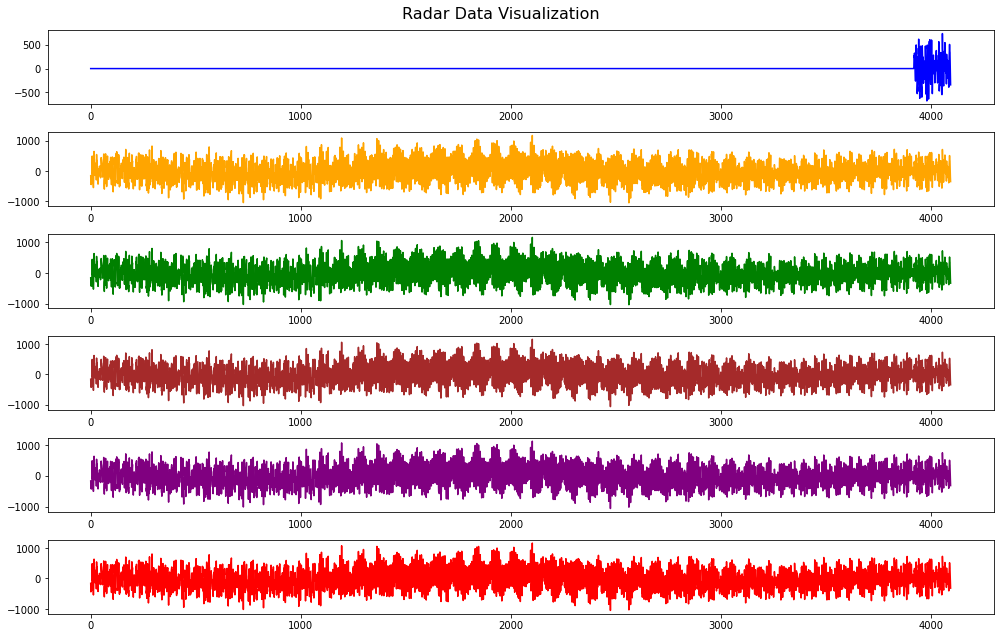

In [4]:
# plot data0, data1, data2, and dataf on subpolots vertically
plt.figure(figsize=(14, 9))
plt.suptitle('Radar Data Visualization', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Index')

plt.subplot(6, 1, 1)
plt.plot(data0, label='Data 0', color='blue')

plt.subplot(6, 1, 2)
plt.plot(data1, label='Data 1', color='orange')

plt.subplot(6, 1, 3)
plt.plot(data2, label='Data 2', color='green')

plt.subplot(6, 1, 4)
plt.plot(dataf2, label='Data Final 2', color='brown')

plt.subplot(6, 1, 5)
plt.plot(dataf1, label='Data Final 1', color='purple')

plt.subplot(6, 1, 6)
plt.plot(dataf0, label='Data Final 0', color='red')

plt.tight_layout()


In [8]:
data0.shape

(4096,)

In [ ]:
data0

array([   0,    0,    0, ...,   62, -177, -343])

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


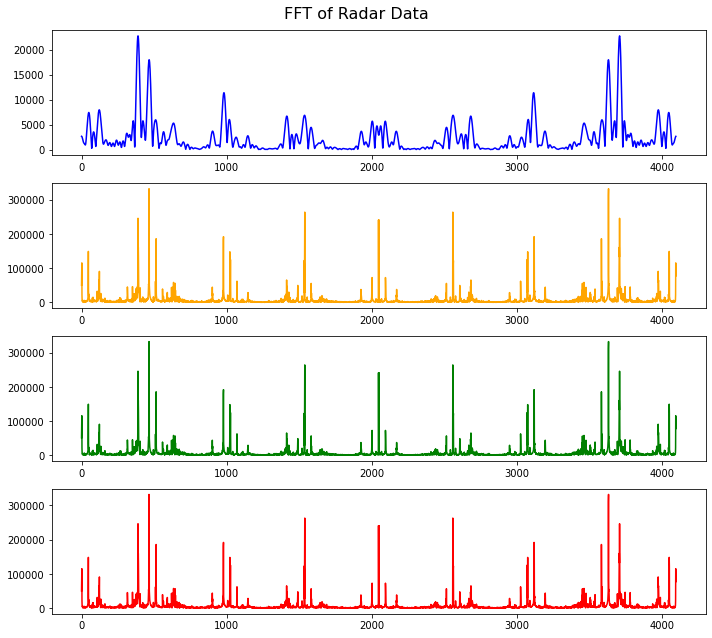

In [5]:
# Do FFT on data0, data1, data2, and dataf
fft_data0 = fft(data0)
fft_data1 = fft(data1)
fft_data2 = fft(data2)
fft_dataf = fft(dataf0)

# Plot the FFT results
plt.figure(figsize=(10, 9))
plt.suptitle('FFT of Radar Data', fontsize=16)
plt.legend(loc='upper right')
plt.xlabel('Frequency Index')

plt.subplot(4, 1, 1)
plt.plot(np.abs(fft_data0), label='FFT Data 0', color='blue')
plt.subplot(4, 1, 2)
plt.plot(np.abs(fft_data1), label='FFT Data 1', color='orange')
plt.subplot(4, 1, 3)
plt.plot(np.abs(fft_data2), label='FFT Data 2', color='green')
plt.subplot(4, 1, 4)
plt.plot(np.abs(fft_dataf), label='FFT Data Final', color='red')

plt.tight_layout()

In [ ]:
!pip install scikit_learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\signalkinetics\\anaconda3\\envs\\CV6869\\Lib\\site-packages\\~-mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



: 

In [132]:
len(eval(df['data'][0]))

2048

In [133]:
ADC_SAMPLING_RATE = 10000  # Hz, TODO

# FFT on all data streams in pandas
ffts = df.iloc[:, 1].apply(lambda x: fft(np.array(eval(x)))).values
ffts = np.vstack([np.abs(f) for f in ffts]).T  # Shape: (fft_len, num_samples)

# freq vals
freqs = fftfreq(len(data0), 1/ADC_SAMPLING_RATE)

# timestamps in sec
timestamps = pd.to_datetime(df.iloc[:, 2])
tds = (timestamps - timestamps.iloc[0]).dt.total_seconds().values

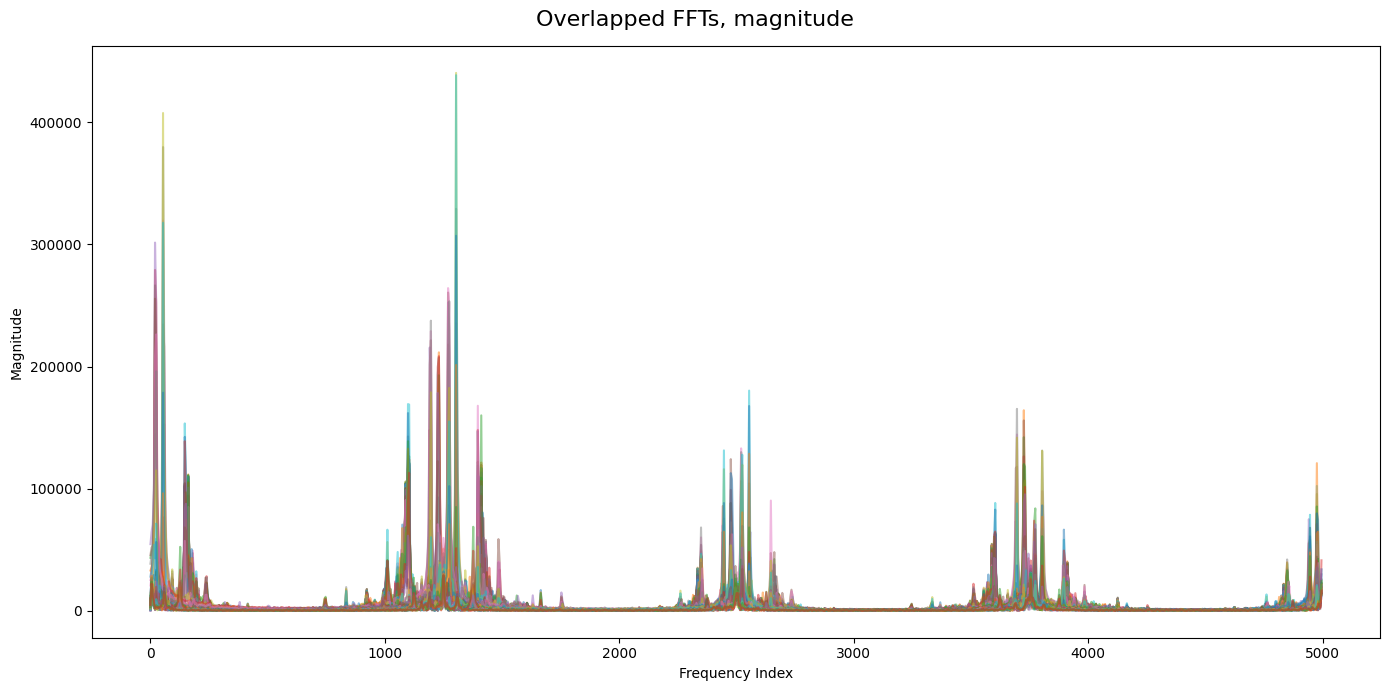

In [134]:
plt.figure(figsize=(14, 7))
plt.suptitle('Overlapped FFTs, magnitude', fontsize=16)
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
for i in range(ffts.shape[1]):
    plt.plot(freqs[:len(freqs)//2], np.abs(ffts[:len(freqs)//2, i]), label=f'Sample {i+1}', alpha=0.5)
plt.tight_layout()

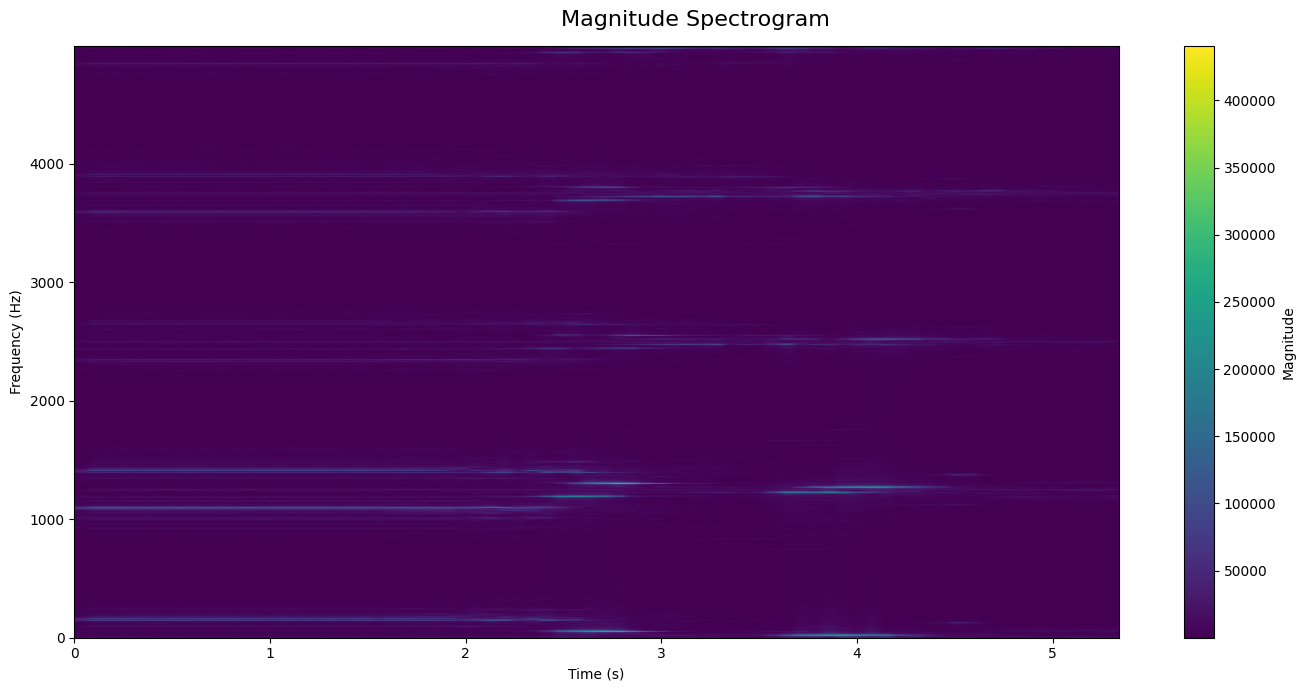

In [135]:
plt.figure(figsize=(14, 7))
plt.suptitle('Magnitude Spectrogram', fontsize=16)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
extent = [0, tds[-1], 0, max(freqs)]
plt.imshow(np.abs(ffts[:len(freqs)//2, :]), aspect='auto', extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.tight_layout()

In [658]:
def correlate_locs_and_meas(self, radar_type, robot_data, radar_data, exp_data, robot_loc_data=None, speed="speed_8"):
        """
        Find the robot locations where each radar measurement was taken by interpolating the robot trajectory.
        Only used in real world experiments.
        Parameters:
            radar_type (str): type of radar to use ("24_ghz, 77_ghz")
            robot_data (dict): loaded robot pickle file using the load_robot_file function
            radar_data (dict): loaded radar adc file using the load_radar_files function
            robot_loc_data (dict): loaded robot location data using the load_robot_loc_files function
            speed (str): the speed of the radar ("speed_4", "speed_8")

        Returns:
            Robot locations and radar data, with one-to-one correspondences
        """
        all_locs = []
        all_radar_data = []
        all_index = []
        assert radar_type in ['77_ghz', '24_ghz'], "Please choose a valid radar type."

        aperture_type = exp_data['aperture size']

        # Load imaging parameters
        params_dict = utilities.get_radar_parameters(radar_type=radar_type, is_sim=False, aperture_type=aperture_type)
        FREQUENCY = params_dict['min_f']
        NUM_FRAMES = params_dict['num_frames']
        SWEEP_TIME = params_dict['sweep_time']
        PERIODICITY = params_dict['periodicity']
        SAMPLES_PER_CHIRP = params_dict['num_samples']
        NUM_CHIRP = params_dict['num_chirps']
        wavelength = c / FREQUENCY
        repeated_meas_threshold = wavelength * (3 / 16)

        # Create interpolation functions for robot locations
        radar_type_num = radar_type[:2]
        robot_loc_data[f'times_{radar_type_num}'] = robot_loc_data[f'times_{radar_type_num}']
        interp_functs = self.get_interpolated_funct(robot_loc_data[f'times_{radar_type_num}'], robot_loc_data[f'tx_{radar_type_num}_locs'])

        # Find robot location for every radar measurement
        for i, filename in enumerate(robot_data['all_radar_filenames']):
            # Load radar file for this row
            created_ts = robot_data['all_radar_created_ts'][i]
            if created_ts == -1: continue
            if int(filename) not in radar_data:
                print(f"Couldn't find file {int(filename)}")
                continue

            # Each radar file contains NUM_FRAMES different radar measurements
            data = radar_data[int(filename)]
            current_row_locs = []
            for j in range(NUM_FRAMES):
                # Compute timestamp of jth measurement inside a file
                start = created_ts + j * (SWEEP_TIME + PERIODICITY)

                # Try to interpolate robot location at this measurement
                try:
                    loc = self.get_interpolated_transforms_from_funct(interp_functs, [start])[0]
                    # Remove two measurements that are too close together
                    if j != 0 and np.min(np.linalg.norm(np.array(current_row_locs)[:, :3] - loc[:3], axis=1)) < repeated_meas_threshold: 
                        continue
                except:
                    continue

                # Load radar data for this measurement
                new_data = data[j * SAMPLES_PER_CHIRP * NUM_CHIRP :
                                j * SAMPLES_PER_CHIRP * NUM_CHIRP + SAMPLES_PER_CHIRP, :]
                if ((radar_type == "24_ghz" and new_data.shape != (SAMPLES_PER_CHIRP, 2)) or
                    (radar_type == "77_ghz" and new_data.shape != (SAMPLES_PER_CHIRP, 4))):
                    print(f'File {filename} did not have expected number of frames. Skipping')
                    continue
                
                # Save data / location / index
                if self.is_optitrack: loc = self.convert_opt_frame(loc)
                all_locs.append(loc)
                current_row_locs.append(loc)
                all_radar_data.append(new_data)
                all_index.append(i * NUM_FRAMES + j)

        # Return all data
        all_locs = np.array(all_locs)
        data = {'radar_data': all_radar_data, 'poses': all_locs}
        return data


In [2]:
def load_radar_file(filepath, num_frames, num_chirp, samples_per_chirp, num_rx):
    """
    Load raw radar files for processing (Note: this function is only needed when processing raw radar data into an image)

    Returns: 
        Loaded complex-valued radar (adc) files for the specified radar type
    """
    fid = open(f'{filepath}', 'rb')

    adcData = np.fromfile(fid, dtype='<i2')
    adcData = np.reshape(adcData, (int(adcData.shape[0] / (num_rx * 2)), num_rx * 2))
    adcData = adcData[:, [0, 1, 2, 3]] + 1j * adcData[:, [4, 5, 6, 7]]

    adcData = adcData.reshape(num_frames, num_chirp, samples_per_chirp, num_rx)

    return adcData

In [27]:
c = 3e8                         # speed of light in m/s

# frame config
# NUM_FRAMES = 8
# NUM_CHIRP = 128                 # chirp loop count
# PERIODICITY = 40                # periodicity in ms
NUM_FRAMES = 100*2
NUM_CHIRP = 128                 # chirp loop count
PERIODICITY = 100               # periodicity in ms

# profile config
FREQUENCY = 77                  # start frequency
SAMPLES_PER_CHIRP = 256         # ADC number of samples
SAMPLE_RATE_KHZ = 10000         # digout sample rate in kHz
RAMP_END_TIME_US = 60           # us
ADC_START_TIME_US = 6           # us
FREQ_SLOPE_MHZ = 29.982         # frequency slope in MHz (/us)

# chan & adc config
NUMRX = 4

SAMPLE_RATE = SAMPLE_RATE_KHZ * 1e3             # digout sample rate in Hz
SWEEP_TIME = SAMPLES_PER_CHIRP / SAMPLE_RATE
FREQ_SLOPE = FREQ_SLOPE_MHZ * 1e12              # frequency slope in Hz (/s)

BANDWIDTH = FREQ_SLOPE * SWEEP_TIME             # bandwidth in Hz
RESOLUTION = c / (2 * BANDWIDTH)                # range resolution in m

print(f"Start frequency: {FREQUENCY} Hz")
print(f"Bandwidth: {BANDWIDTH} Hz")
print(f"Sweep time: {SWEEP_TIME} s")
print(f"Slope: {FREQ_SLOPE} Hz/s")
print(f"Range resolution: {RESOLUTION} m")
print(f"Sample rate: {SAMPLE_RATE} Hz")

adc_data = load_radar_file('./adc_data_ceil+obj_1m.bin', NUM_FRAMES, NUM_CHIRP, SAMPLES_PER_CHIRP, NUMRX)
print("ADC Data shape:", adc_data.shape)
# adcData 

Start frequency: 77 Hz
Bandwidth: 767539200.0 Hz
Sweep time: 2.56e-05 s
Slope: 29982000000000.0 Hz/s
Range resolution: 0.19542975785471284 m
Sample rate: 10000000.0 Hz
ADC Data shape: (200, 128, 256, 4)


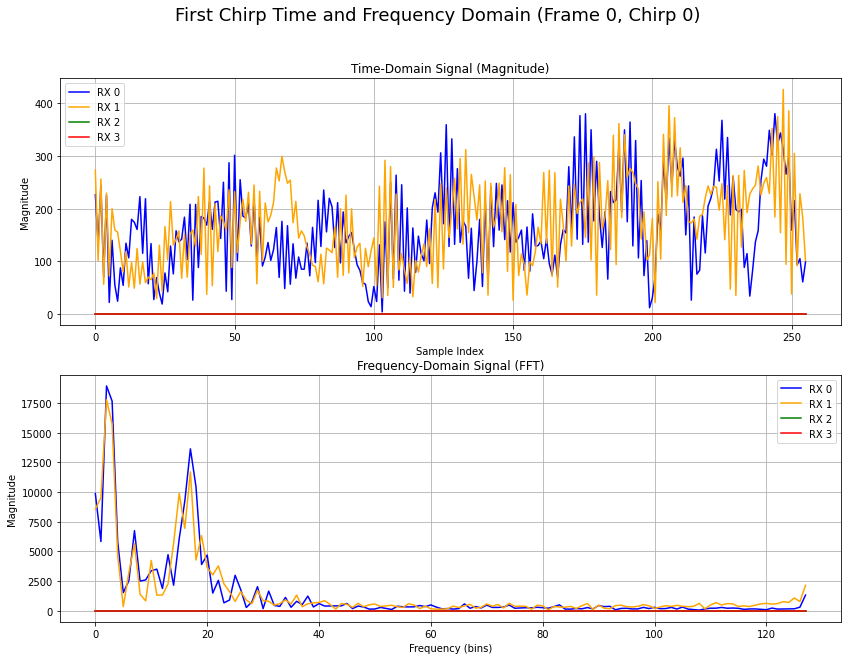

In [28]:
frame_idx = 0
chirp_idx = 0

# FFT on the first chirps across all RXs
first_chirp_ffts = np.array([fft(adc_data[frame_idx, chirp_idx, :, rx]) for rx in range(NUMRX)])
N = first_chirp_ffts.shape[1]

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('First Chirp Time and Frequency Domain (Frame 0, Chirp 0)', fontsize=18)

# Subplot 1: Time-domain magnitude
axs[0].plot(np.abs(adc_data[chirp_idx, frame_idx, :, 0]), label='RX 0', color='blue')
axs[0].plot(np.abs(adc_data[chirp_idx, frame_idx, :, 1]), label='RX 1', color='orange')
axs[0].plot(np.abs(adc_data[chirp_idx, frame_idx, :, 2]), label='RX 2', color='green')
axs[0].plot(np.abs(adc_data[chirp_idx, frame_idx, :, 3]), label='RX 3', color='red')
axs[0].set_title('Time-Domain Signal (Magnitude)')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Magnitude')
axs[0].legend()
axs[0].grid(True)

# Subplot 2: Frequency-domain magnitude (FFT of RX 0)
axs[1].plot(np.abs(first_chirp_ffts[0, :N//2]), label='RX 0', color='blue')
axs[1].plot(np.abs(first_chirp_ffts[1, :N//2]), label='RX 1', color='orange')
axs[1].plot(np.abs(first_chirp_ffts[2, :N//2]), label='RX 2', color='green')
axs[1].plot(np.abs(first_chirp_ffts[3, :N//2]), label='RX 3', color='red')
axs[1].set_title('Frequency-Domain Signal (FFT)')
axs[1].set_xlabel('Frequency (bins)')
axs[1].set_ylabel('Magnitude')
axs[1].legend()
axs[1].grid(True)

In [29]:
# coherently average the chirps for each frame
chirps_avg = np.mean(adc_data, axis=1)                    # Average across chirps
print("Chirps Average shape:", chirps_avg.shape)

Chirps Average shape: (200, 256, 4)


In [30]:
# remove DC from all data
chirps_no_dc = chirps_avg - np.mean(chirps_avg, axis=1, keepdims=True)
print("Chirps No DC shape:", chirps_no_dc.shape)

Chirps No DC shape: (200, 256, 4)


In [31]:
# frame-to-frame background subtraction
chirps_subtracted = np.copy(chirps_no_dc)  # Create a copy for subtraction
for i in range(1, NUM_FRAMES):
    chirps_subtracted[i] -= chirps_no_dc[i - 1]  # Subtract the previous frame

# remove first frame
chirps_subtracted = chirps_subtracted[1:]  # Remove the first frame
print("Chirps Subtracted shape:", chirps_subtracted.shape)

Chirps Subtracted shape: (199, 256, 4)


In [32]:
# chirps = chirps_subtracted  # Update chirps to the subtracted data
chirps = chirps_no_dc  # Update chirps to the subtracted data

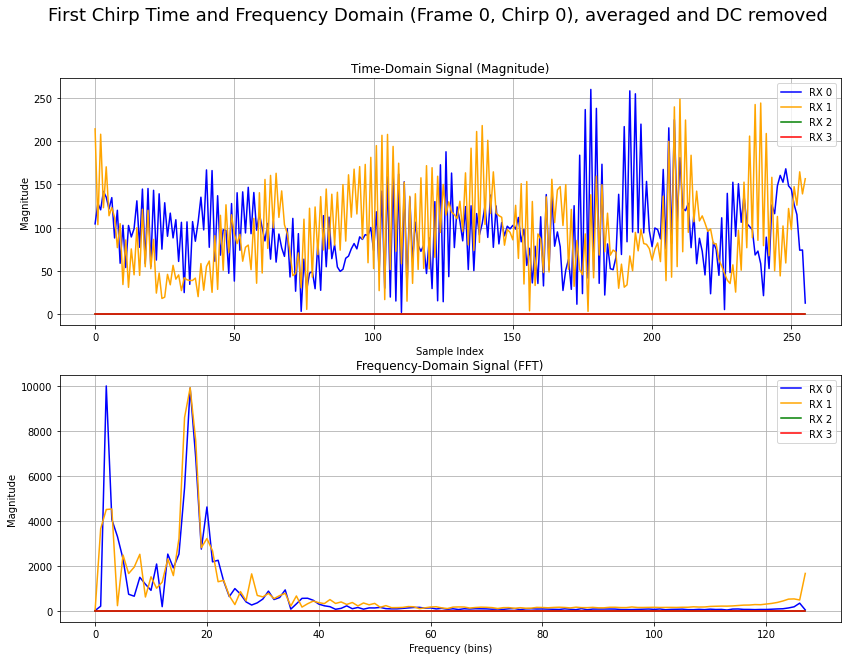

In [33]:
frame_idx = 0

# FFT on the first chirps across all RXs
first_chirp_ffts = np.array([fft(chirps[frame_idx, :, rx]) for rx in range(NUMRX)])
N = first_chirp_ffts.shape[1]

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('First Chirp Time and Frequency Domain (Frame 0, Chirp 0), averaged and DC removed', fontsize=18)

# Subplot 1: Time-domain magnitude
axs[0].plot(np.abs(chirps[frame_idx, :, 0]), label='RX 0', color='blue')
axs[0].plot(np.abs(chirps[frame_idx, :, 1]), label='RX 1', color='orange')
axs[0].plot(np.abs(chirps[frame_idx, :, 2]), label='RX 2', color='green')
axs[0].plot(np.abs(chirps[frame_idx, :, 3]), label='RX 3', color='red')
axs[0].set_title('Time-Domain Signal (Magnitude)')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Magnitude')
axs[0].legend()
axs[0].grid(True)

# Subplot 2: Frequency-domain magnitude (FFT of RX 0)
axs[1].plot(np.abs(first_chirp_ffts[0, :N//2]), label='RX 0', color='blue')
axs[1].plot(np.abs(first_chirp_ffts[1, :N//2]), label='RX 1', color='orange')
axs[1].plot(np.abs(first_chirp_ffts[2, :N//2]), label='RX 2', color='green')
axs[1].plot(np.abs(first_chirp_ffts[3, :N//2]), label='RX 3', color='red')
axs[1].set_title('Frequency-Domain Signal (FFT)')
axs[1].set_xlabel('Frequency (bins)')
axs[1].set_ylabel('Magnitude')
axs[1].legend()
axs[1].grid(True)

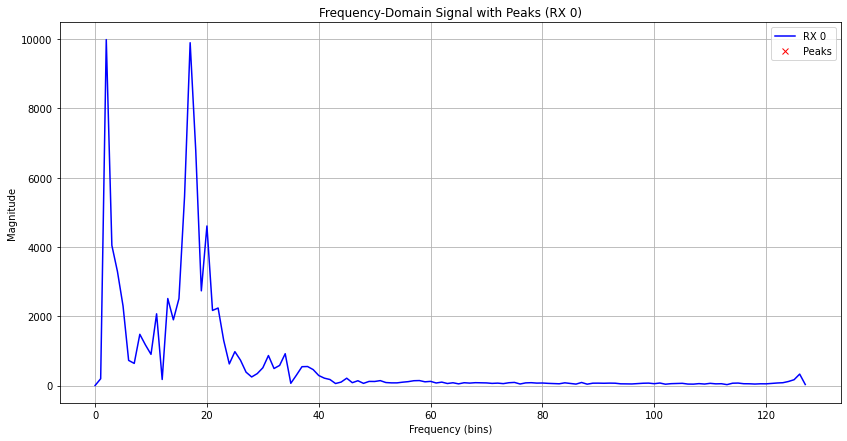

In [34]:
# scipy find peak on np.abs(first_chirp_ffts[0, :])

from scipy.signal import find_peaks

peaks, _ = find_peaks(np.abs(first_chirp_ffts[0, :N//2]), height=10000)

# plot
plt.figure(figsize=(14, 7))
plt.plot(np.abs(first_chirp_ffts[0, :N//2]), label='RX 0', color='blue')
plt.plot(peaks, np.abs(first_chirp_ffts[0, peaks]), "x", label='Peaks', color='red')
plt.title('Frequency-Domain Signal with Peaks (RX 0)')
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

In [35]:
# print peaks found:
for peak in peaks:
    print(f"Peak at index {peak}, range: {peak * RESOLUTION:.2f} m, frequency: {peak * SAMPLE_RATE / SAMPLES_PER_CHIRP / 1e6:.2f} MHz")

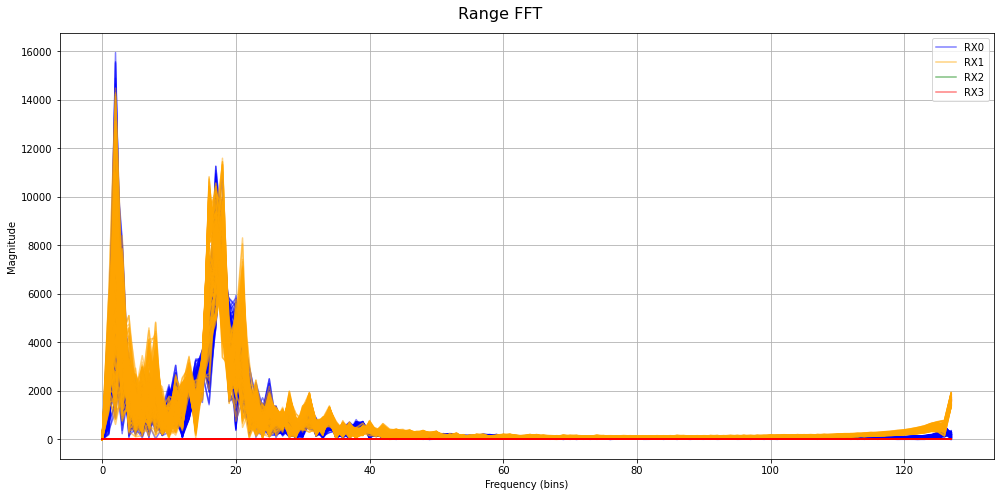

In [36]:
# Apply FFT along the sample (fast time) axis
range_ffts = fft(chirps[:, :, :] , axis=1)                   # shape (frames, samples)
N = range_ffts.shape[1]                                      # number of samples

# Plot the range FFT for the first 3 frames
plt.figure(figsize=(14, 7))
plt.suptitle('Range FFT', fontsize=16)
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')
color_map = ['blue', 'orange', 'green', 'red']
for rx in range(NUMRX):
    for frame in range(range_ffts.shape[0]):
        if frame == 0:
            plt.plot(np.abs(range_ffts[frame, :N//2, rx]), label=f'RX{rx}', color=color_map[rx], alpha=0.5)
        else:
            plt.plot(np.abs(range_ffts[frame, :N//2, rx]), color=color_map[rx], alpha=0.5)
plt.legend()
plt.grid(True)
plt.tight_layout()

(0.0, 5.0)

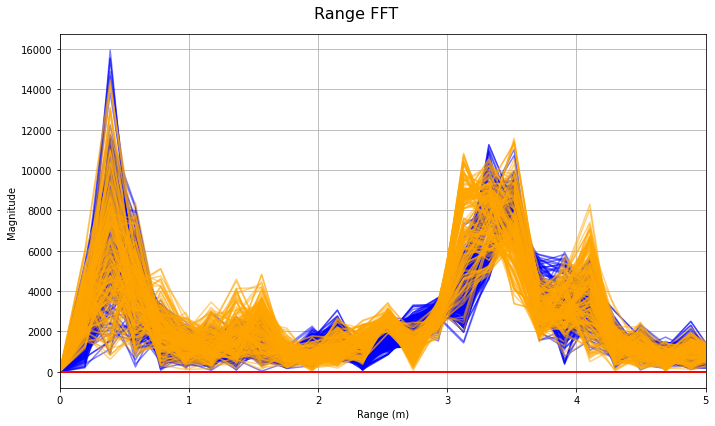

In [37]:
# convert freqs to meters
N = range_ffts.shape[1]  # number of samples
fft_freqs = fftfreq(N, 1 / (SAMPLE_RATE))  # Frequency bins
range_meters = fft_freqs[:N//2] * c / (2 * FREQ_SLOPE)

# Plot the range FFT for all frames
plt.figure(figsize=(10, 6))
plt.suptitle('Range FFT', fontsize=16)
color_map = ['blue', 'orange', 'green', 'red']
for rx in range(NUMRX):
    for frame in range(range_ffts.shape[0]):
        plt.plot(range_meters, np.abs(range_ffts[frame, :N//2, rx]), label=f'RX{rx} Frame {frame}', alpha=0.5, color=color_map[rx])
plt.xlabel('Range (m)')
plt.ylabel('Magnitude')
# plt.legend()
plt.grid(True)
plt.tight_layout()

# zoom into first 5 meters
plt.xlim(0, 5)

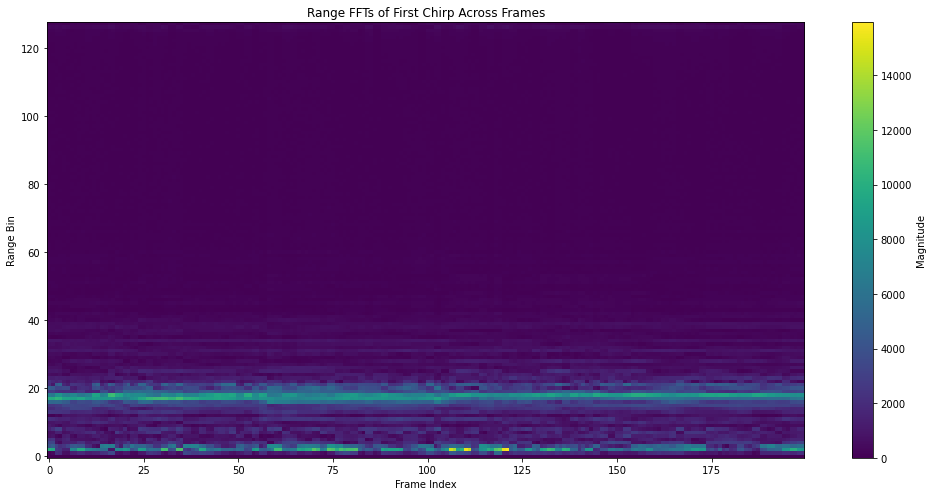

In [14]:
# range FFTs for all frames
plt.figure(figsize=(14, 7))
plt.imshow(np.abs(range_ffts[:, :N//2, 0]).T, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Magnitude')
plt.title("Range FFTs of First Chirp Across Frames")
plt.xlabel("Frame Index")
plt.ylabel("Range Bin")
plt.tight_layout()

In [15]:
# frame config
# NUM_FRAMES = 8
# NUM_CHIRP = 128                 # chirp loop count
# PERIODICITY = 40                # periodicity in ms
NUM_FRAMES = 100*2
NUM_CHIRP = 128                 # chirp loop count
PERIODICITY = 100               # periodicity in ms

# profile config
FREQUENCY = 77                  # start frequency
SAMPLES_PER_CHIRP = 256         # ADC number of samples
SAMPLE_RATE_KHZ = 10000         # digout sample rate in kHz
RAMP_END_TIME_US = 60           # us
ADC_START_TIME_US = 6           # us
FREQ_SLOPE_MHZ = 29.982         # frequency slope in MHz (/us)

# chan & adc config
NUMRX = 4

SAMPLE_RATE = SAMPLE_RATE_KHZ * 1e3             # digout sample rate in Hz
SWEEP_TIME = SAMPLES_PER_CHIRP / SAMPLE_RATE
FREQ_SLOPE = FREQ_SLOPE_MHZ * 1e12              # frequency slope in Hz (/s)

BANDWIDTH = FREQ_SLOPE * SWEEP_TIME             # bandwidth in Hz
RESOLUTION = c / (2 * BANDWIDTH)                # range resolution in m

print(f"Start frequency: {FREQUENCY} Hz")
print(f"Bandwidth: {BANDWIDTH} Hz")
print(f"Sweep time: {SWEEP_TIME} s")
print(f"Slope: {FREQ_SLOPE} Hz/s")
print(f"Range resolution: {RESOLUTION} m")
print(f"Sample rate: {SAMPLE_RATE} Hz")

adc_data = load_radar_file('./adc_data_Raw_0_box.bin', NUM_FRAMES, NUM_CHIRP, SAMPLES_PER_CHIRP, NUMRX)
print("ADC Data shape:", adc_data.shape)

Start frequency: 77 Hz
Bandwidth: 767539200.0 Hz
Sweep time: 2.56e-05 s
Slope: 29982000000000.0 Hz/s
Range resolution: 0.19542975785471284 m
Sample rate: 10000000.0 Hz
ADC Data shape: (200, 128, 256, 4)
